In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
import json
import isodate

In [50]:
df = pd.read_csv('MarquesBrownlee.csv')
df.drop(labels = ['Unnamed: 0'], axis = 1, inplace = True)

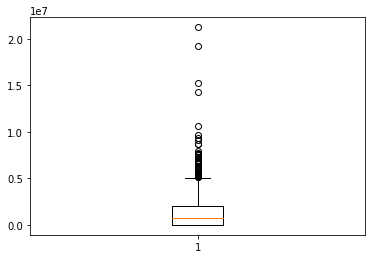

In [52]:
plt.boxplot(df.view_count);
# top 5 videos are distinct outliers

In [53]:
top_5_index = df.view_count.sort_values(ascending = False).head().index
df.drop(labels = top_5_index, inplace = True)
# remove top 5 videos

In [55]:
df['season'] = df['publish_month'].map(lambda x: 
                               'winter' if (x == 12) |( x < 3) else 
                               ('spring' if (3 <= x < 6) else
                               ('summer' if (6 <= x < 9) else 
                               'fall')))
df['day_part'] = df['publish_hour'].map(lambda x: 
                               'morning' if (6 <= x <12) else 
                               ('afternoon' if (12 <= x < 18) else
                               ('evening' if (18 <= x < 24) else 
                               'overnight')))
df['weekend'] = df['publish_day'].map(lambda x: 1 if x >= 5 else 0)
                               
df.season = df.season.astype('category').cat.codes    
df.day_part = df.day_part.astype('category').cat.codes

In [58]:
season_dummies = pd.get_dummies(df.season, prefix ='season')
season_dummies.drop(columns = 'season_2', inplace = True)

day_part_dummies = pd.get_dummies(df.day_part, prefix = 'day_part')
day_part_dummies.drop(columns = 'day_part_2', inplace = True)

df = pd.concat([df, season_dummies, day_part_dummies], axis = 1)
df.drop(columns = ['season', 'day_part'], inplace = True)

In [78]:
df['review'] = df.title.map(lambda x: 1 if ('Review' in x.split(' ')) | 
                            ('Review!' in x.split(' ')) | 
                            ('Review:' in x.split(' ')) |
                            ('Impressions' in x.split(' ')) | 
                            ('Impressions:' in x.split(' ')) |
                            ('Impressions!' in x.split(' ')) | 
                            ('Unboxing' in x.split(' ')) | 
                            ('Unboxing:' in x.split(' ')) |
                            ('Unboxing!' in x.split(' ')) 
                            else 0)

In [107]:
df['apple'] = df.title.map(lambda x: 1 if ('Apple' in x.split(' ')) | 
                            ('Apple!' in x.split(' ')) | 
                            ('iPhone' in x.split(' ')) |
                            ('iPhone!' in x.split(' ')) | 
                            ('iPad!:' in x.split(' ')) |
                            ('iPad' in x.split(' ')) | 
                            ('iMac' in x.split(' ')) | 
                            ('Mac' in x.split(' ')) |
                            ('Macbook' in x.split(' ')) |
                            ('Macbook:' in x.split(' ')) |
                            ('AirPods' in x.split(' ')) |
                            ('Airpods!' in x.split(' ')) 
                            else 0)

In [115]:
df['google'] = df.title.map(lambda x: 1 if ('Google' in x.split(' ')) else 0)

In [124]:
df['samsung'] = df.title.map(lambda x: 1 if ('Samsung' in x.split(' ')) | 
                            ('Samsung!' in x.split(' ')) | 
                            ('Galaxy' in x.split(' ')) |
                            ('Note' in x.split(' '))  
                            else 0)

In [133]:
df['tesla'] = df.title.map(lambda x: 1 if ('Tesla' in x.split(' ')) else 0)

In [135]:
df.drop(columns = ['publish_date', 'title', 'publish_day', 'publish_hour', 'publish_month', 'live'], inplace = True)

In [136]:
df.to_csv('MarquesBrownlee_cleaned.csv')